## Support Vector Machines


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

import seaborn as sns; sns.set()

In [3]:
## librería para poder crear datasets
from sklearn.datasets.samples_generator import make_blobs

c:\Users\Golfa\AppData\Local\Programs\Python\Python37-32\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [4]:
## creamos información con dos puntos separados, y una desviación de 0.6
X, Y= make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.6)

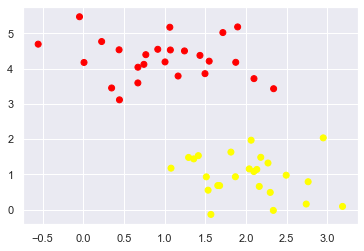

In [5]:
## pintamos la información
plt.scatter(X[:, 0], X[:,1], c=Y, cmap="autumn")

(-1.0, 3.5)

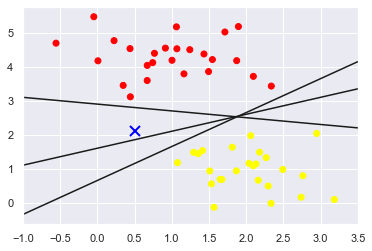

In [6]:
## agremos un punto que se pueda clasificar de distinta manera
xx = np.linspace(-1, 3.5)
plt.scatter(X[:,0], X[:,1], c=Y, cmap="autumn")
plt.plot([0.5], [2.1], "x", color="blue", markeredgewidth=2, markersize=10)

for a, b in [(1,0.65), (0.5, 1.6), (-0.2, 2.9)]:
    yy = a * xx + b
    plt.plot(xx, yy, "-k")
    
plt.xlim(-1,3.5)

(-1.0, 3.5)

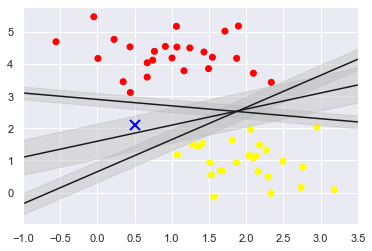

In [7]:
## maximización del margen creamos corredores
## agremos un punto que se pueda clasificar de distinta manera
xx = np.linspace(-1, 3.5)
plt.scatter(X[:,0], X[:,1], c=Y, cmap="autumn")
plt.plot([0.5], [2.1], "x", color="blue", markeredgewidth=2, markersize=10)

for a, b, d in [(1,0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yy = a * xx + b
    plt.plot(xx, yy, "-k")
    plt.fill_between(xx, yy-d, yy+d, edgecolor="none",color="#BBBBBB", alpha=0.4)
plt.xlim(-1,3.5)

## Creacion del modelo SVM

In [8]:
from sklearn.svm import SVC

In [9]:
## separamos los datos de forma linear
model=SVC(kernel="linear", C=1)
## los datos y la clases
model.fit(X, Y)

SVC(C=1, kernel='linear')

In [10]:
def plt_svc(model, ax=None, plot_support=True):
    """Plot de la función de decisión para una clasificación en 2D con SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    ##Generamos la parrila de puntos para evaluar el modelo
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(yy,xx)
    
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    
    ##Representamos las fronteras y los márgenes del SVC
    ax.contour(X,Y,P, colors="k", levels=[-1,0,1], linestyles=["--", "-", "--"])
   
    
    if plot_support:
        ax.scatter(model.support_vectors_[:,0], 
                   model.support_vectors_[:,1], 
                   s=300, linewidth=1, facecolors = "black");
    
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

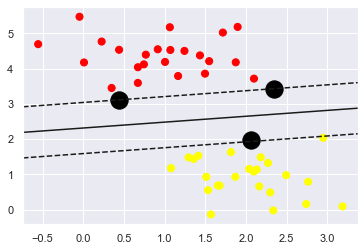

In [11]:
plt.scatter(X[:,0], X[:,1], c = Y, s = 50, cmap = "autumn")
plt_svc(model, plot_support=True)

In [36]:
def plot_svm(N=10, ax=None):
    """Crear modelos apartir de diferentes tamaños de conjuntos de datos"""
    #Creamos las muestras
    X, Y=make_blobs(n_samples=200, centers=2, random_state=0, cluster_std=0.6)
    ## redimensionamos el array al número de muestras que ocupamos
    X=X[:N]
    Y=Y[:N]
    ## creamos el modelo
    model=SVC(kernel="linear", C=150)
    model.fit(X, Y)
    ax=ax or plt.gca()
    ax.scatter(X[:,0], X[:,1], c=Y, s = 50, cmap="autumn")
    ax.set_xlim(-1,4)
    ax.set_ylim(-1,6)
    plt_svc(model, ax)

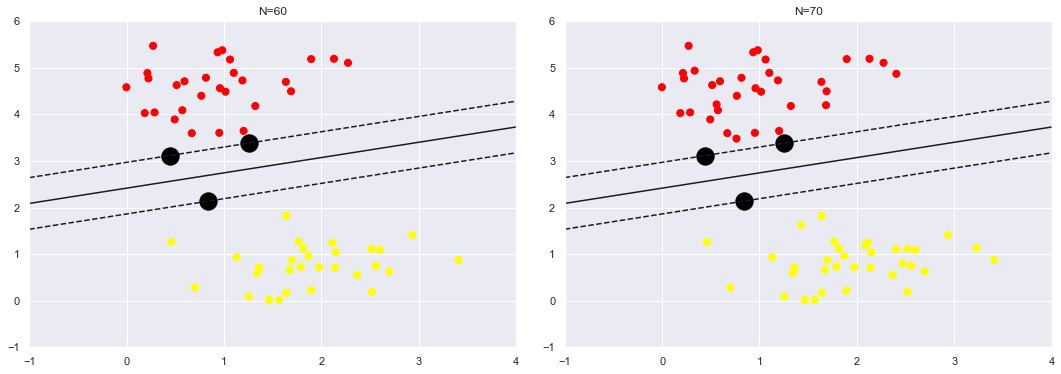

In [37]:
## creamos graficos
fig, ax = plt.subplots(1,2, figsize=(16,6))
## ajustamos posición
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
## probamos con diferentes cantidades de información
for ax_i, N in zip(ax, [60, 70]):
    plot_svm(N, ax_i)
    ax_i.set_title("N={0}".format(N))